In [1]:
#load libraries 
from __future__ import division
import argparse

import matplotlib
matplotlib.use('PS')
%matplotlib inline
import tensorflow as tf
import random 
import numpy as np
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras.models import Model
from keras.layers import Dense, Activation, Input, concatenate, Lambda, Add
from keras.utils import plot_model
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

import matplotlib.pyplot as plt 
import GPy
from fipy import *
# import matplotlib as mpl
# mpl.rcParams['figure.dpi']= 200
import seaborn as sns 
sns.set_context('talk')
sns.set_style('white')
from pdb import set_trace as keyboard
import sys
import time 
plt.rcParams["patch.force_edgecolor"] = True

/Users/sharmila/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
DNN_dir='/Users/sharmila/Desktop/research/work/03_NN_PDE/Level3/part8_image/1_Study_EF_Vs_SR_c=15_f=10_bounded/ellx=0.03/results/loss_EF_form/DNN_type=Resnet_nx=100_seed=4_b_okb_journal'

In [3]:
# these files are test inputfields, test fipy solution and test DNN solution
cellcenters = np.load(os.path.join(DNN_dir,'cellcenters.npy')) # or x_fipy

samples_inputfield = np.load(os.path.join(DNN_dir,'samples_inputfield.npy')) 
samples_u_fipy = np.load(os.path.join(DNN_dir,'samples_u_fipy.npy'))
samples_u_DNN = np.load(os.path.join(DNN_dir,'samples_u_DNN.npy')) 

relerrors = np.load(os.path.join(DNN_dir,'relerrors.npy')) 
r2scores = np.load(os.path.join(DNN_dir,'r2scores.npy')) 

In [4]:
nsamples = np.shape(samples_inputfield)[0] # test data size
print nsamples

x_fipy = cellcenters
a = samples_inputfield 
u_DNN = samples_u_DNN 
u_fipy = samples_u_fipy

1000


In [5]:
nx = int(np.sqrt(cellcenters.shape[0]))

In [6]:
# relative RMS error
rel_RMS_num = []
rel_RMS_den = []

1


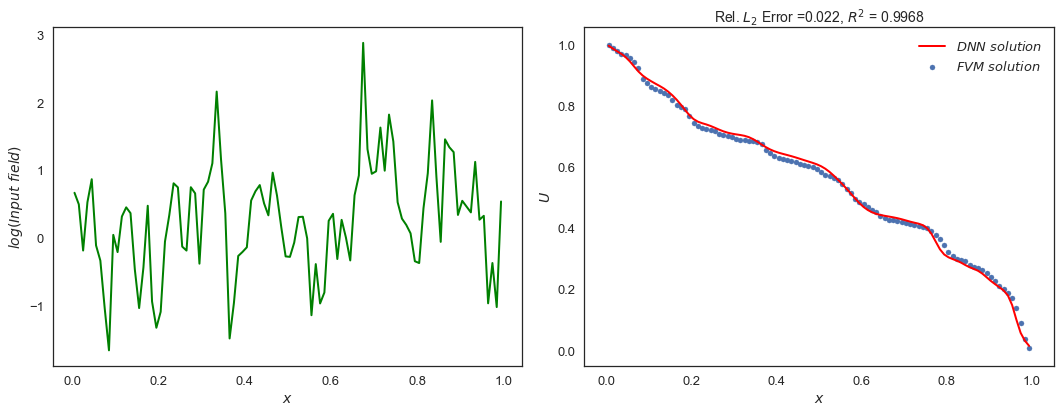

2


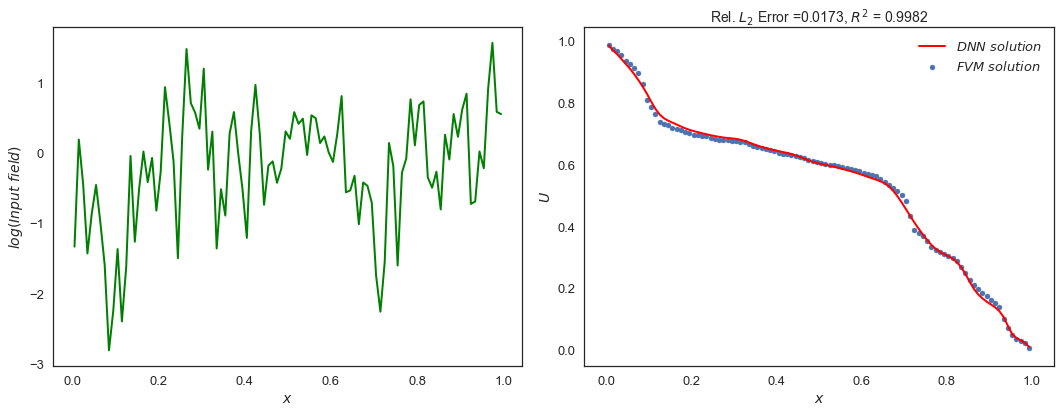

3


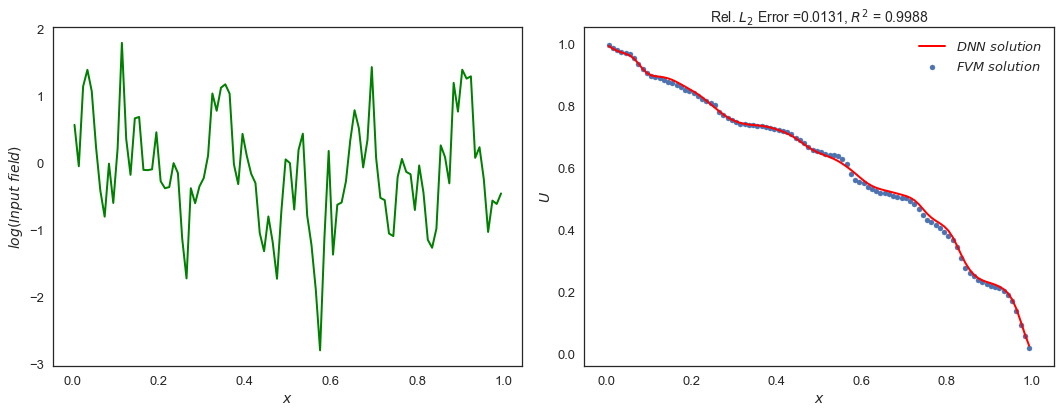

4


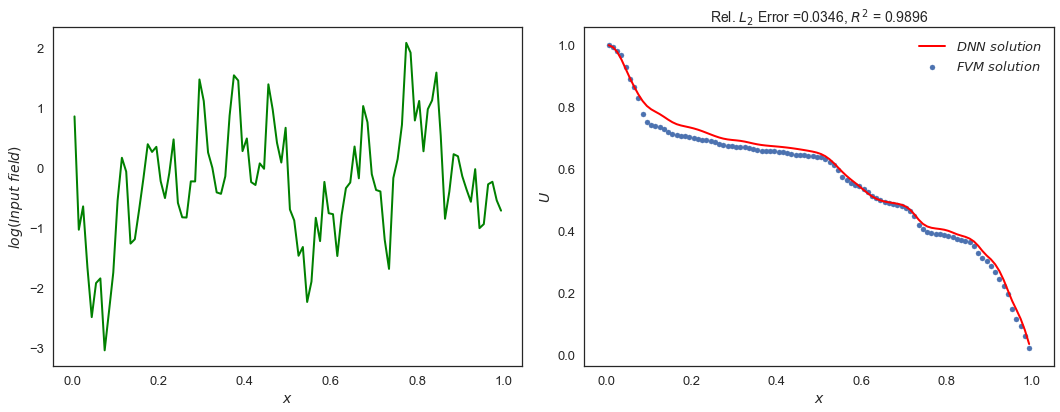

5


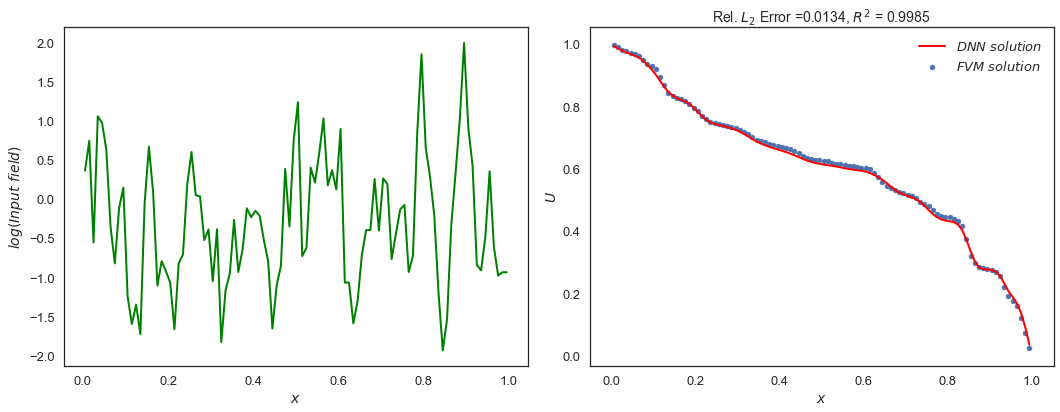

6


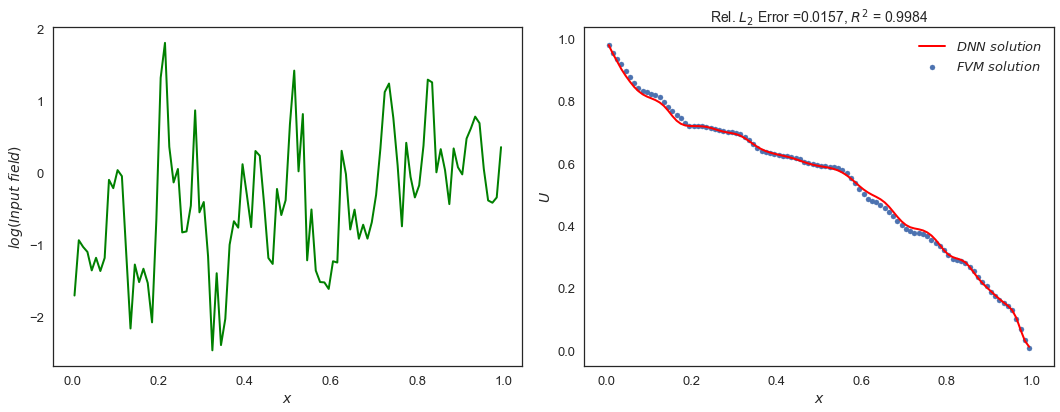

7


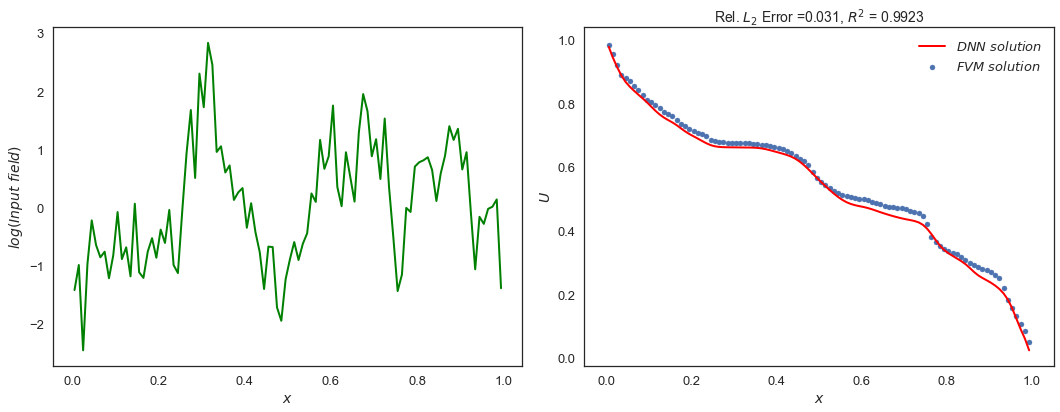

8


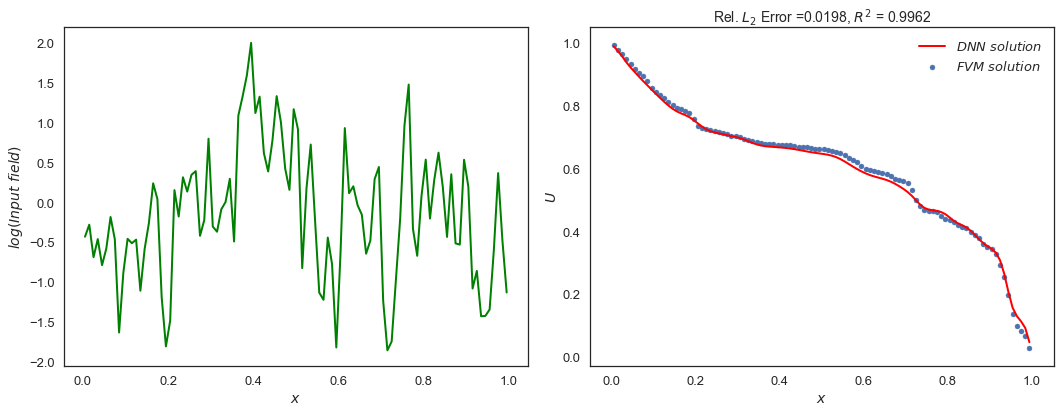

9


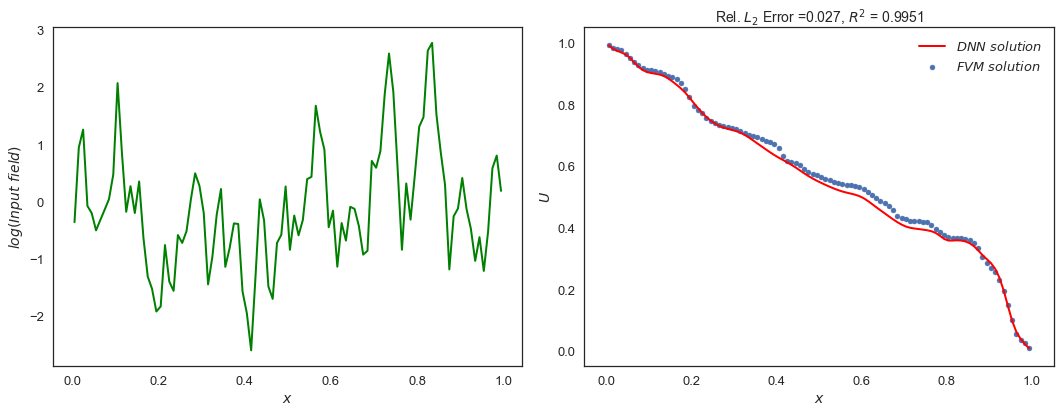

10


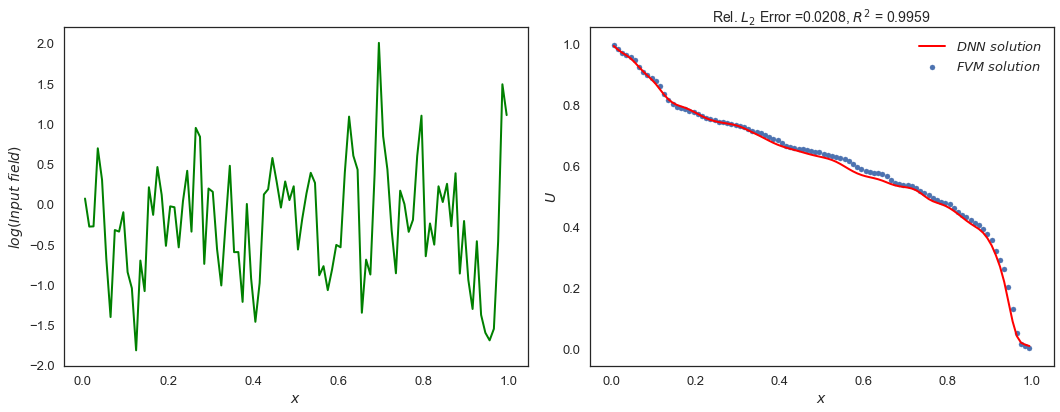

11


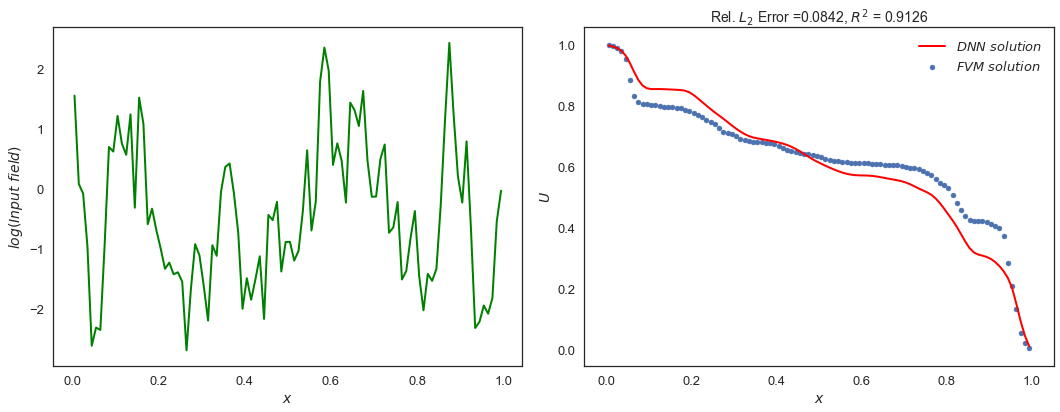

12


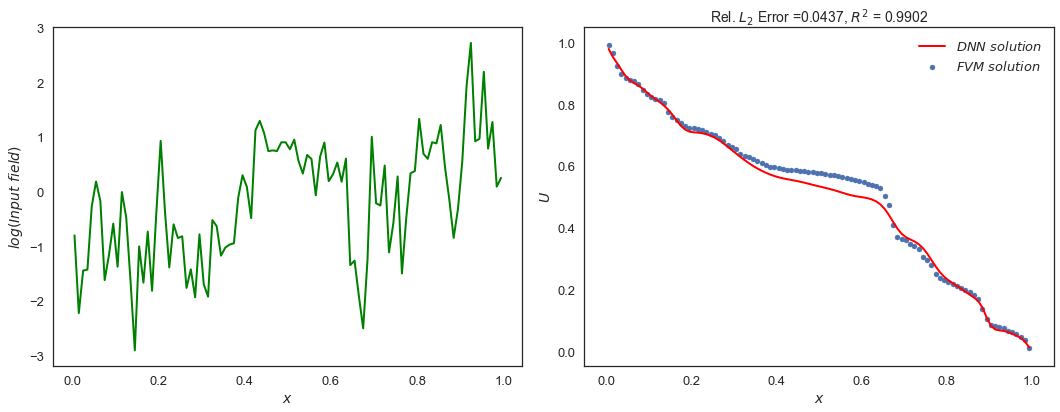

13


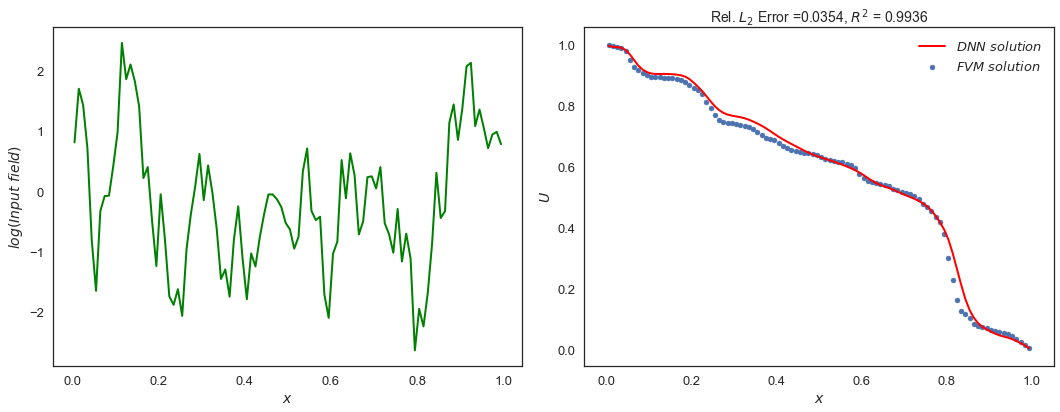

14


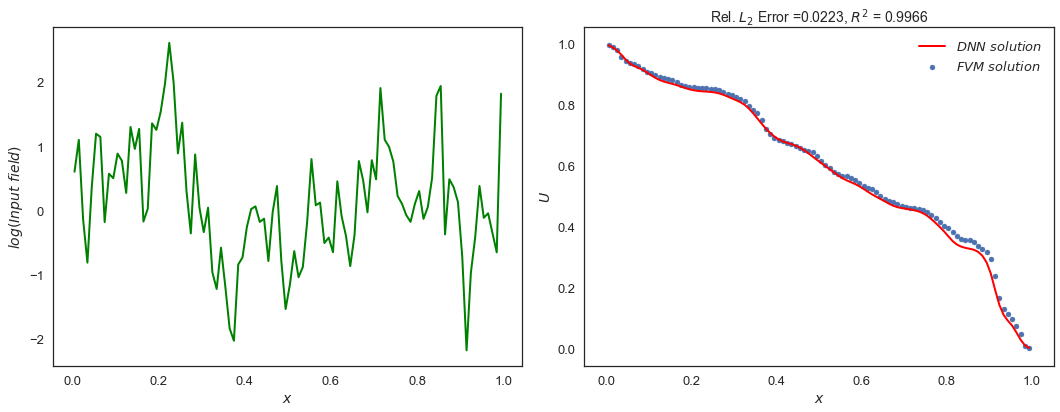

15


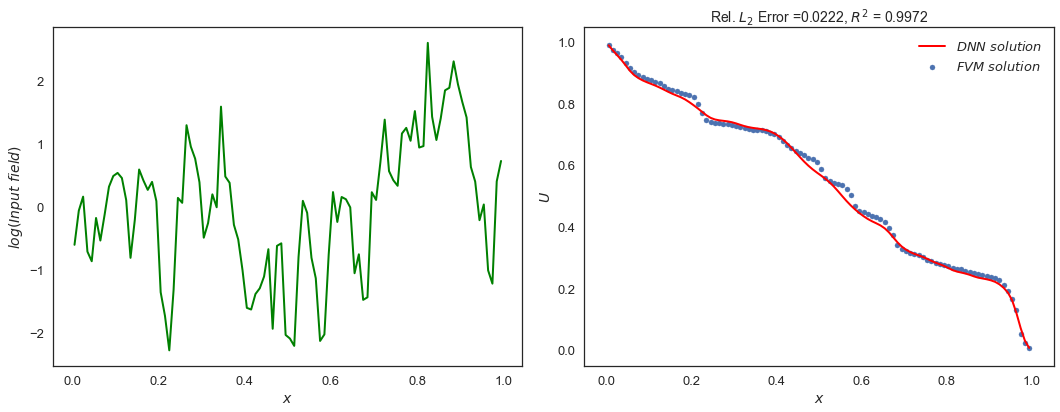

16


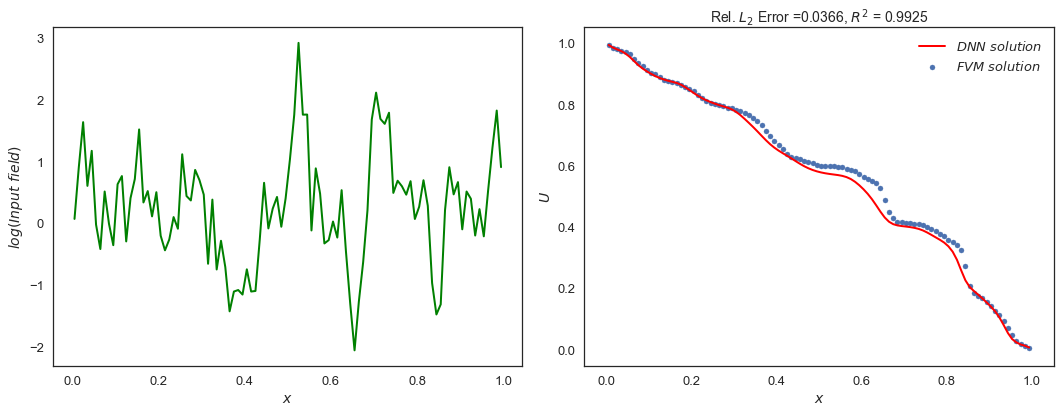

17


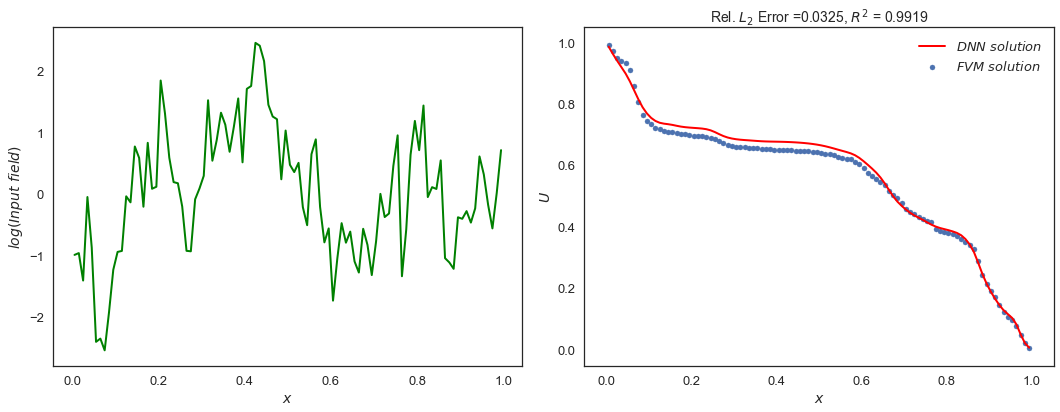

18


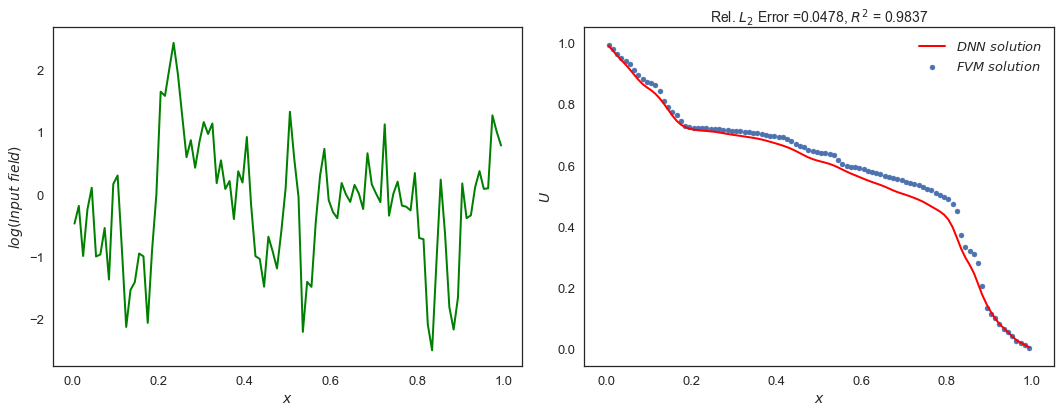

19


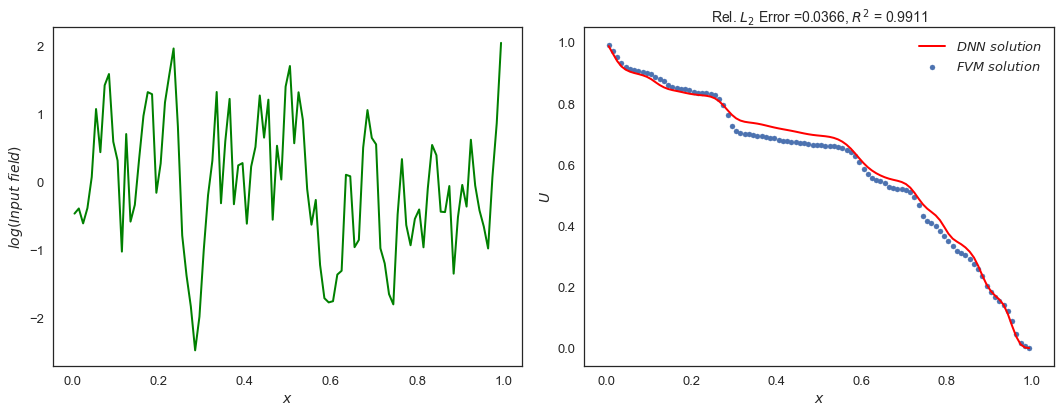

20


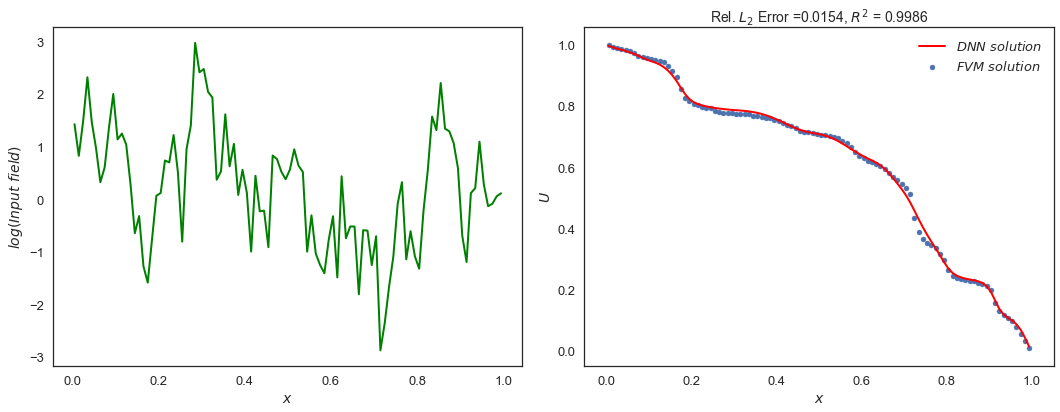

21


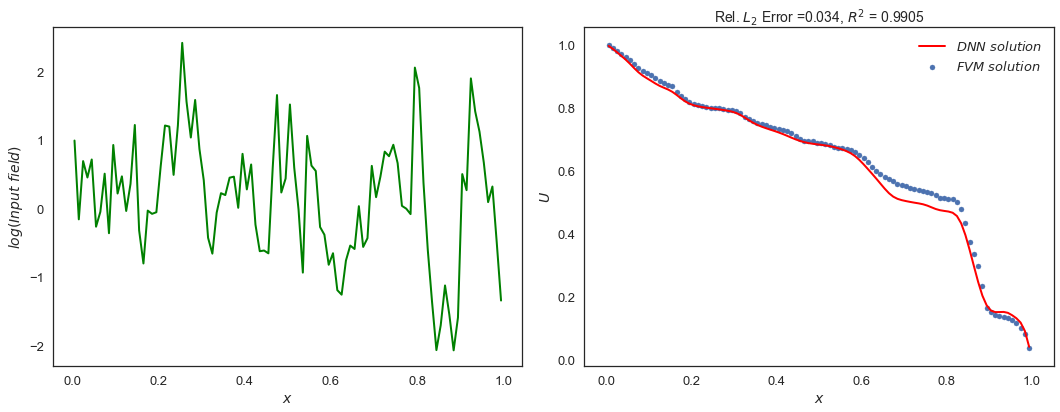

22


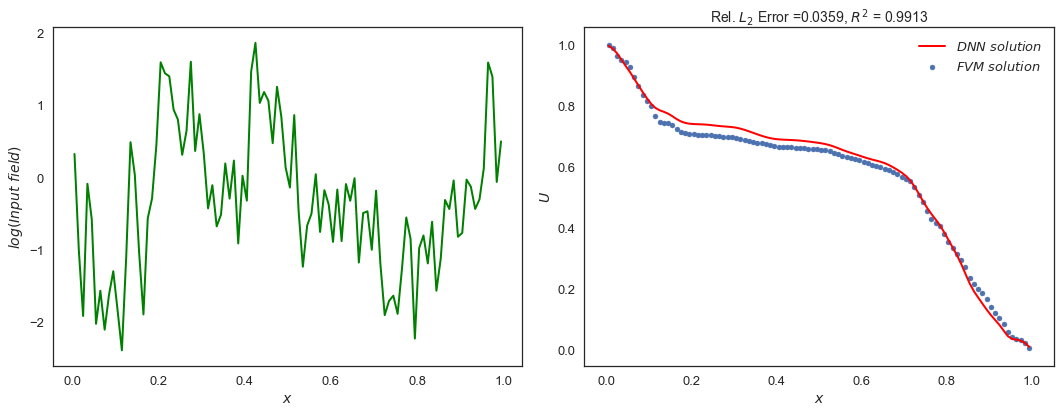

23


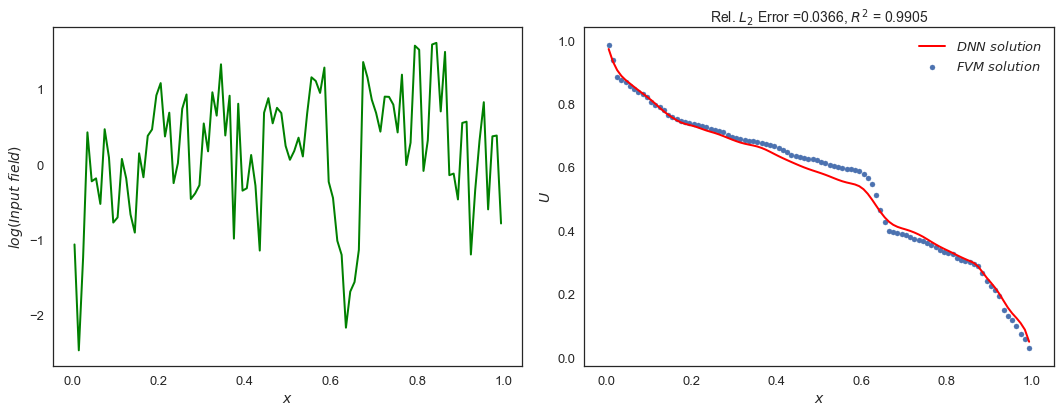

24


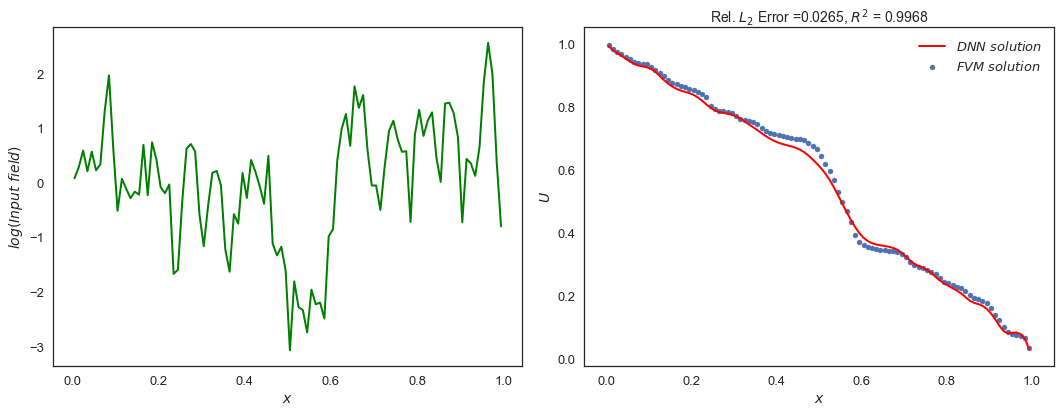

25


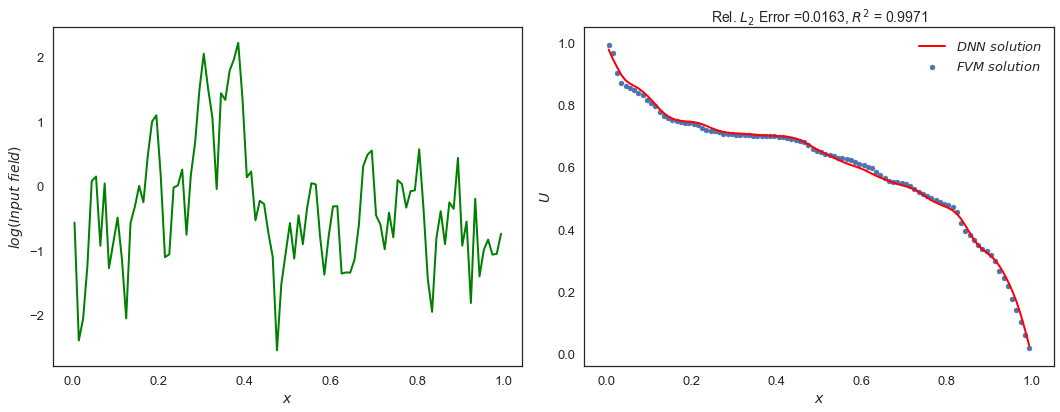

26


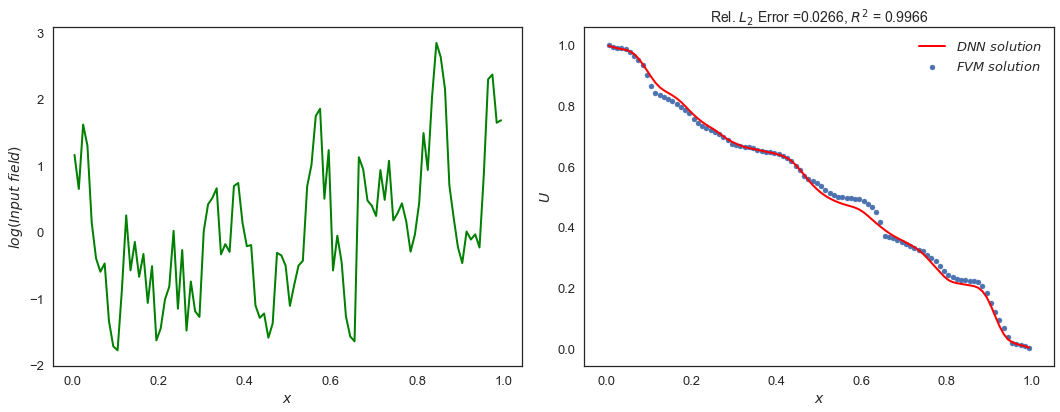

27


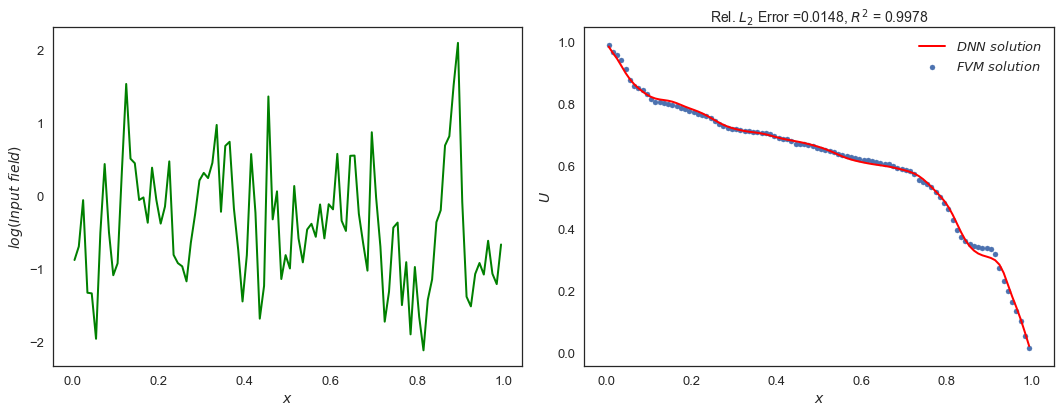

28


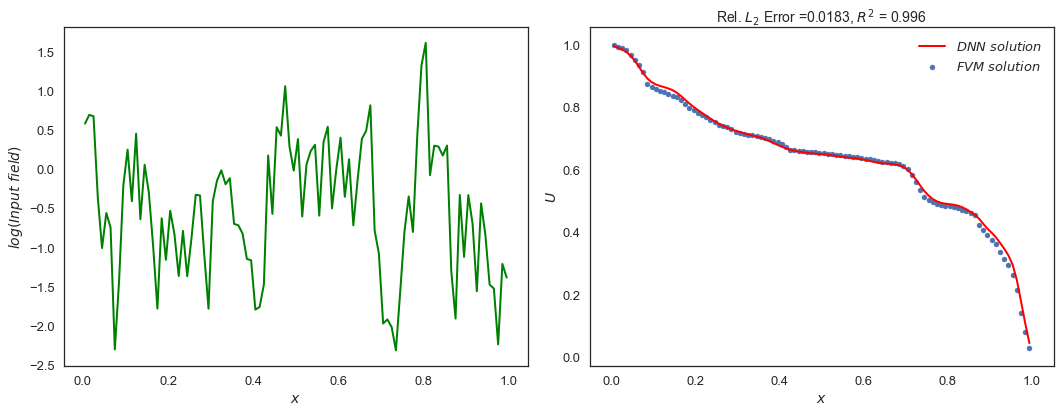

29


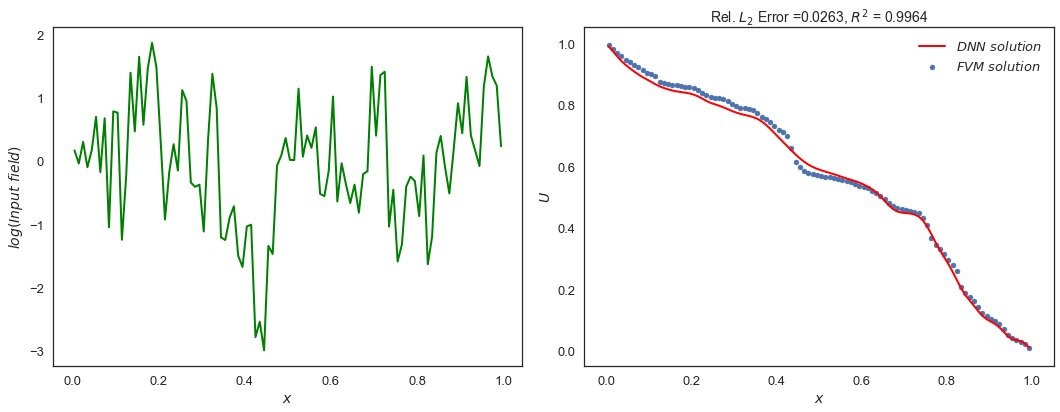

30


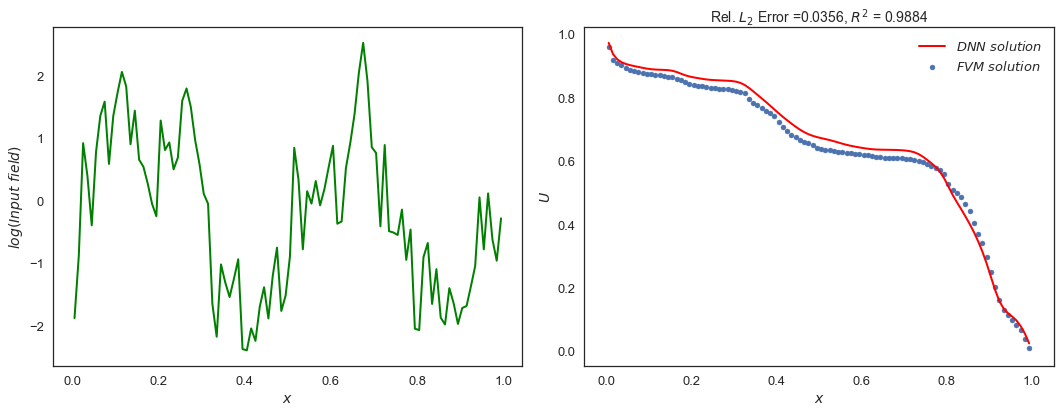

1000
--------------------------------------------------------------


In [7]:
for i in range(nsamples): # test cases
###############################################################
    rel_RMS_num.append(np.sum((u_fipy[i,:]-u_DNN[i,:])**2, axis=0))
    rel_RMS_den.append(np.sum((u_fipy[i,:])**2, axis=0))
###############################################################
    if i<=29: 
        print i+1
        # Initialize the plot
        fig = plt.figure(figsize=(15,6))
        
        try:
            ax1.lines.remove(lines[0])
            ax2.lines.remove(lines[0])
            lines2.set_visible(False)
        except:
            pass
        ##########
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.plot(x_fipy, np.log(a[i,:]), 'g', lw=2, label='$log(Input \ field)$')
        ax1.set_xlabel('$x$',  fontsize=14)
        ax1.set_ylabel('$log(Input \ field)$', fontsize=14)
        ##########
        ax2 = fig.add_subplot(1, 2, 2)
        lines = ax2.plot(x_fipy, u_DNN[i,:], 'r', lw=2,  label='$DNN \ solution$')
        # lines2 = ax2.plot(x_fipy, u_fipy, 'b', lw=2)
        # lines2 = plt.scatter(x_fipy, u_fipy, s=10, cmap='Greens', label='FVM solution')
        lines2 = ax2.scatter(x_fipy, u_fipy[i,:], s=25, cmap='Greens',label='$FVM \ solution$')
        plt.title('Rel. $L_2$ Error ='+str(relerrors[i])+', $R^{2}$ = '+str(r2scores[i]), fontsize=14)

        ax2.set_xlabel('$x$',  fontsize=14)
        ax2.set_ylabel(r'$U$', fontsize=14)
        plt.legend(loc='best')
        plt.tight_layout()
        ##########
        # plt.suptitle('test_case='+str(i+1)+'_DNN_type='+str(DNN_type)+'_nx='+str(nx)+'_seed='+str(seed)+'_'+str(variation), fontsize=12)
        plt.savefig('test_case='+str(i+1)+'.pdf')
        plt.show()          
print i+1
print ("--------------------------------------------------------------")
####################################################################################################################
plt.close('all') 

In [8]:
####################################################################################################################
# https://www.rocq.inria.fr/modulef/Doc/GB/Guide6-10/node21.html
rel_RMS_error = np.sqrt(np.sum(rel_RMS_num)/np.sum(rel_RMS_den))
print ('relative_RMS_error='+str(rel_RMS_error))

relative_RMS_error=0.030107109534555917


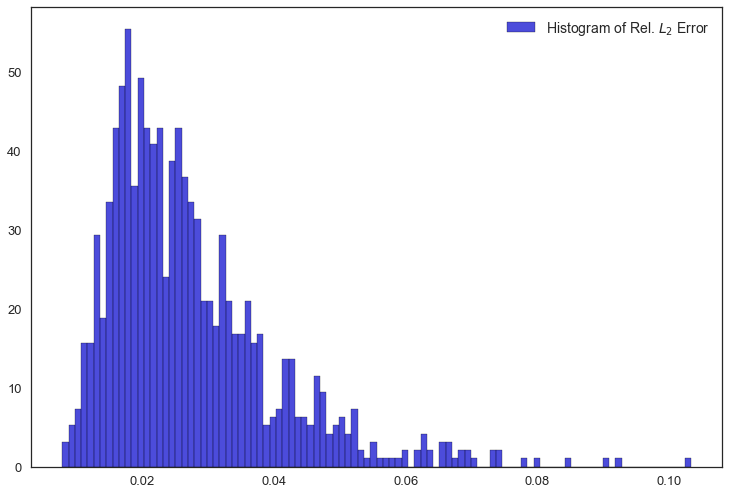

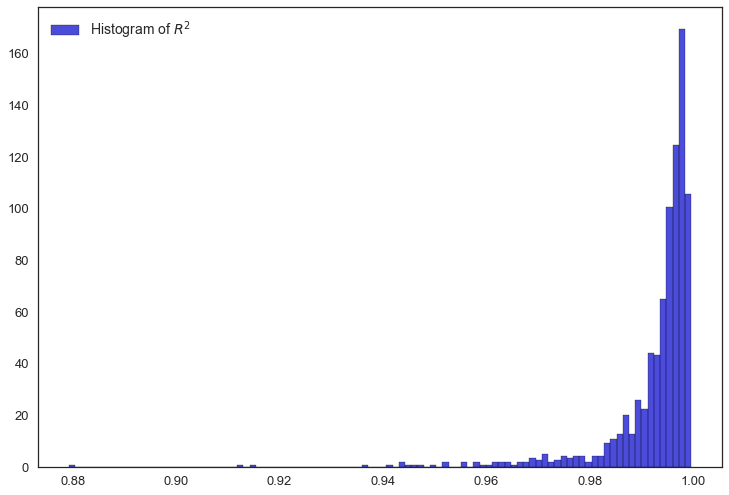

In [9]:
#plt.figure(figsize=(8, 6))
plt.hist(relerrors, alpha = 0.7, bins = 100, normed=True, label='Histogram of Rel. $L_2$ Error', color="mediumblue")
plt.tight_layout()
plt.legend(loc = 'best', fontsize = 14)
plt.savefig('rel_errors_hist.pdf') 
plt.show()

#plt.figure(figsize=(8, 6))
plt.hist(r2scores, alpha = 0.7, bins = 100, normed=True, label='Histogram of $R^2$', color="mediumblue")
plt.tight_layout()
plt.legend(loc = 'best', fontsize = 14)
plt.savefig('r2scores_hist.pdf') 
plt.show()